In [2]:
%matplotlib inline
from __future__ import print_function
from matplotlib import colors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import numpy as np
from collections import Counter
from tqdm import tqdm 

In [3]:
dic = {'well':[],
       'genename':[],
       '1xcov'   :[],
       '10xcov'  :[],
       '30xcov'  :[],
       'rDepth'  :[],
       'depth'   :[],
       'match'   :[],
      'match.ratio' : []}

file_list = glob.glob('./TUM_plexWell_20160615/all/bam_files_10kintrons/allgenes_v1/match_ov0.6/*.all.txt')

In [4]:
for ef in file_list:
    for line in open(ef):
        cell = line.strip().split('\t')
        genename,cov1x,cov10x,cov30x,rDth,dth,mch,rMch = cell
        dic['well'].append('_'.join(ef.split('/')[-1].split('_')[1:3]))
        dic['genename'].append(genename)
        dic['1xcov'].append(cov1x)
        dic['10xcov'].append(cov10x)
        dic['30xcov'].append(cov30x)
        dic['rDepth'].append(rDth)
        dic['depth'].append(int(dth))
        dic['match'].append(mch)
        dic['match.ratio'].append(rMch)

df = pd.DataFrame(dic,columns=['well','genename','1xcov','10xcov','30xcov','rDepth','depth','match','match.ratio'])

mask = (df['match.ratio'].astype(float) > 0.6)
df = df[mask]

df_ix = df.set_index('genename').sortlevel()

In [5]:
## retrieve the well where a gene have max count 

file_ex = 'expected'
dic_ex = {}
for line in open(file_ex):
    cell = line.strip().split('\t')
    plate = cell[0]+'_'+cell[1]
    genes = cell[3:]
    for gene in genes:
        genename = gene+'.v5.5'
        dic_ex[genename] = plate
        
with open('out.txt','w') as f:
    for ix in set(df_ix.index.values):
        edf = df_ix.loc[ix]
        if isinstance(edf,pd.Series):
            #print(ix,edf['well'],file=f,sep='\t')
            try:
                print(ix,edf['well'],dic_ex[ix],(edf['well'] == dic_ex[ix]),sep='\t',file=f)
            except KeyError:
                print(ix,edf['well'],'Contamination',sep='\t',file=f)
        else:
            depthlist = np.array([int(x) for x in df_ix.loc[ix]['depth'].values])
            mask     = (depthlist == max(depthlist))
            
            #print(ix,edf['well'][mask],file=f,sep='\t')
            try:
                print(ix,edf['well'].values[mask][0],dic_ex[ix],(edf['well'].values[mask][0] == dic_ex[ix]),sep='\t',file=f)
            except KeyError:
                print(ix,edf['well'].values[mask][0],'Contamination',sep='\t',file=f)
            #print (mask)
            

In [6]:
# genes have only one well 
Outfile = open('gene2onewell.txt','w')
for ix in df_ix.index:
    edf = df_ix.loc[ix]
    if isinstance(edf,pd.Series):
        try:
            print (ix, edf['well'], dic_ex[ix],(edf['well'] == dic_ex[ix]),file=Outfile)
        except KeyError:
            print (ix, edf['well'], 'Contamination',file=Outfile)
Outfile.close()

In [7]:
# multiwellhit genes 
dic_count_30x = dict(Counter(df_ix[df_ix['30xcov'].astype(float) > 0.9].index.values))

k = np.array(dic_count_30x.keys())
v = np.array(dic_count_30x.values())
mask = (v>=2)
k[mask]

i = 0 
for gene in k[mask]:
    if gene in dic_ex.keys():
        if i == 0:
            #print(df_ix.loc[gene])
            edf = df_ix.loc[gene].sort_values(by='depth',ascending=False)
            mask = (edf['30xcov'].astype(float) > 0.9)
            edf = edf[mask]
            i += 1
        else:
            eedf = df_ix.loc[gene].sort_values(by='depth',ascending=False)
            mask = (eedf['30xcov'].astype(float) > 0.9)
            eedf = eedf[mask]
            edf  = edf.append(eedf)

edf.to_csv('multiwells.csv',sep='\t')
multihitgenes = list(set(edf.index))

In [8]:
max([int(x) for x in df_ix.loc['Cre12.g554700.v5.5']['depth'].values])

2267797

In [9]:
dic_pseudowellnumber = {x:y for y,x in enumerate(set(df_ix['well'].values))}

In [10]:
def ex_bool(x):
    try:
        if x['well'] == dic_ex[x['genename']]:
            return 'red'
        else: return 'skyblue'
    except KeyError:
        return 'gray' 
df['ex_bool'] = df.apply(ex_bool,axis=1)

In [11]:
genename = df['genename'].values
dicN2G = dict(enumerate(set(genename)))
dicG2N = {v:k for k,v in enumerate(set(genename))}

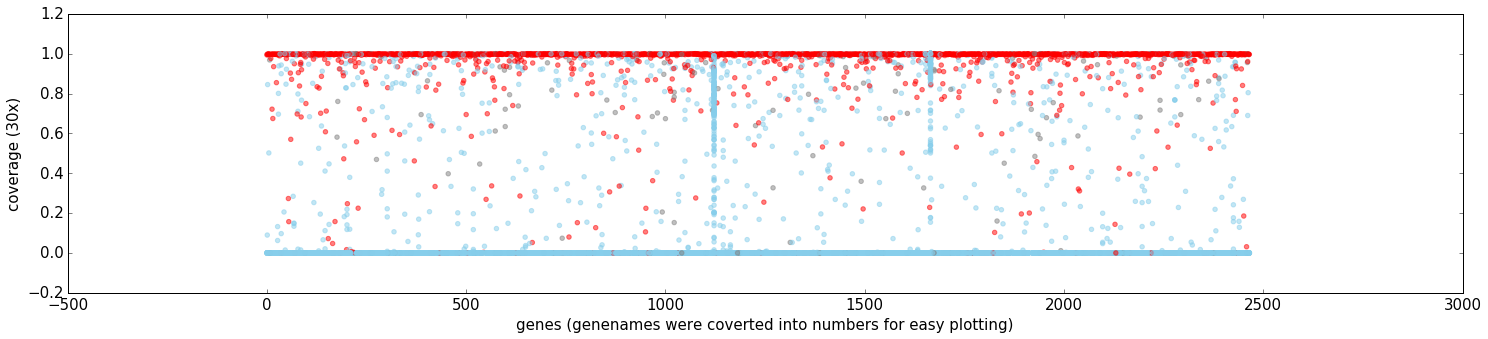

In [12]:
plt.rcParams['figure.figsize'] = (25,5)
plt.rcParams['font.size'] = 15
plt.scatter([dicG2N[x] for x in df['genename'].values], df['30xcov'].values,color=list(df['ex_bool'].values),alpha=0.5)
plt.xlabel('genes (genenames were coverted into numbers for easy plotting)')
plt.ylabel('coverage (30x)')

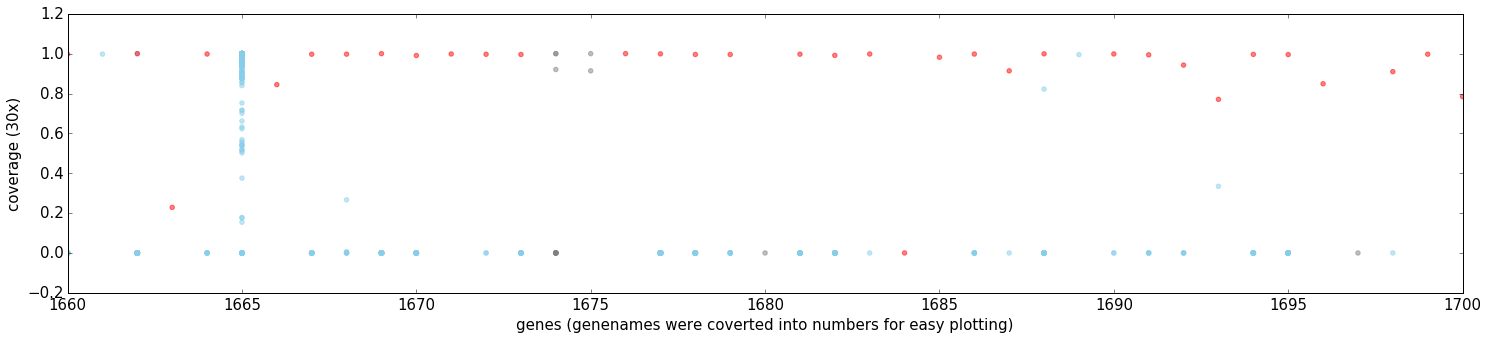

In [13]:
plt.rcParams['figure.figsize'] = (25,5)
plt.rcParams['font.size'] = 15
plt.scatter([dicG2N[x] for x in df['genename'].values], df['30xcov'].values,color=list(df['ex_bool'].values),alpha=0.5)
plt.xlim(1660,1700)
plt.xlabel('genes (genenames were coverted into numbers for easy plotting)')
plt.ylabel('coverage (30x)')

In [14]:
dicN2G[1669]

'Cre16.g674291.v5.5'

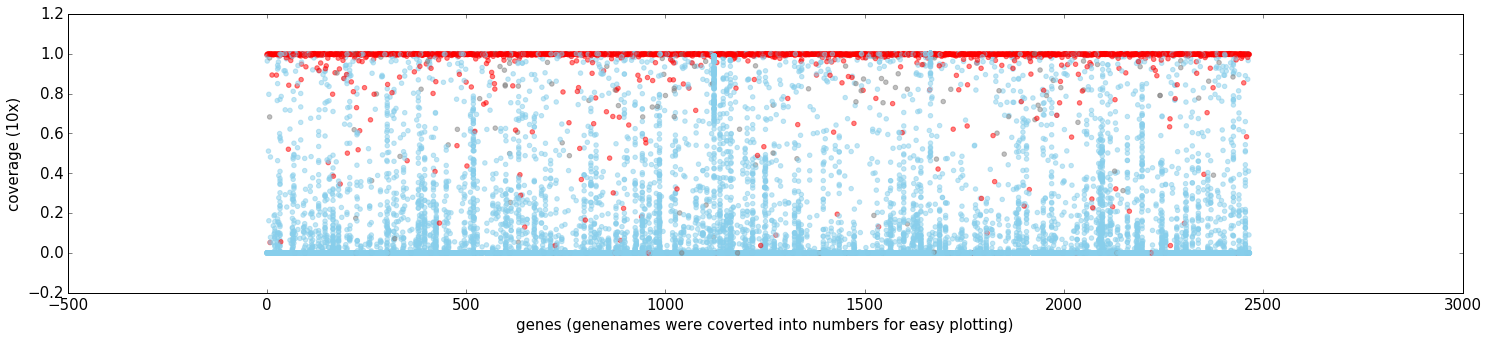

In [15]:
plt.rcParams['figure.figsize'] = (25,5)
plt.rcParams['font.size'] = 15
plt.scatter([dicG2N[x] for x in df['genename'].values], df['10xcov'].values,color=list(df['ex_bool'].values),alpha=0.5)
plt.xlabel('genes (genenames were coverted into numbers for easy plotting)')
plt.ylabel('coverage (10x)')

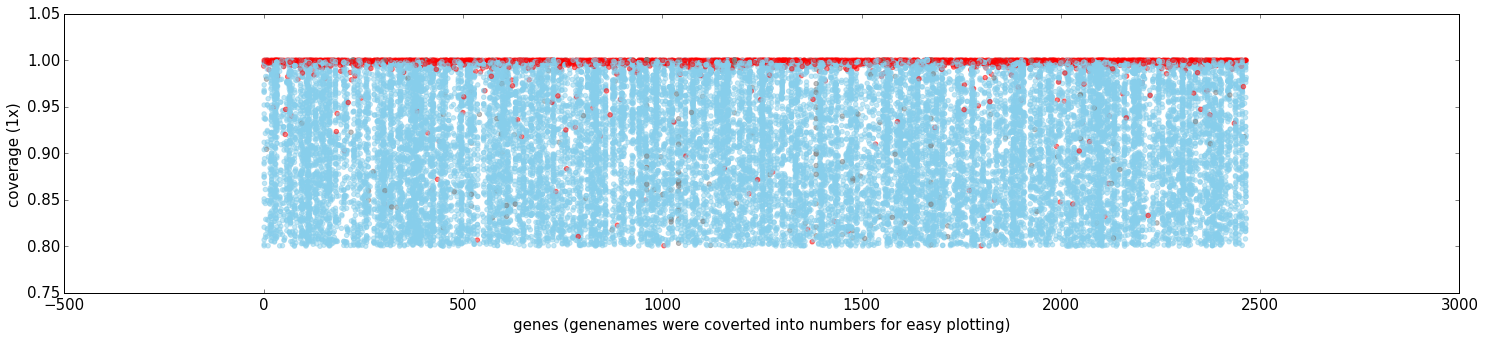

In [16]:
plt.rcParams['figure.figsize'] = (25,5)
plt.rcParams['font.size'] = 15
plt.scatter([dicG2N[x] for x in df['genename'].values], df['1xcov'].values,color=list(df['ex_bool'].values),alpha=0.5)
plt.xlabel('genes (genenames were coverted into numbers for easy plotting)')
plt.ylabel('coverage (1x)')

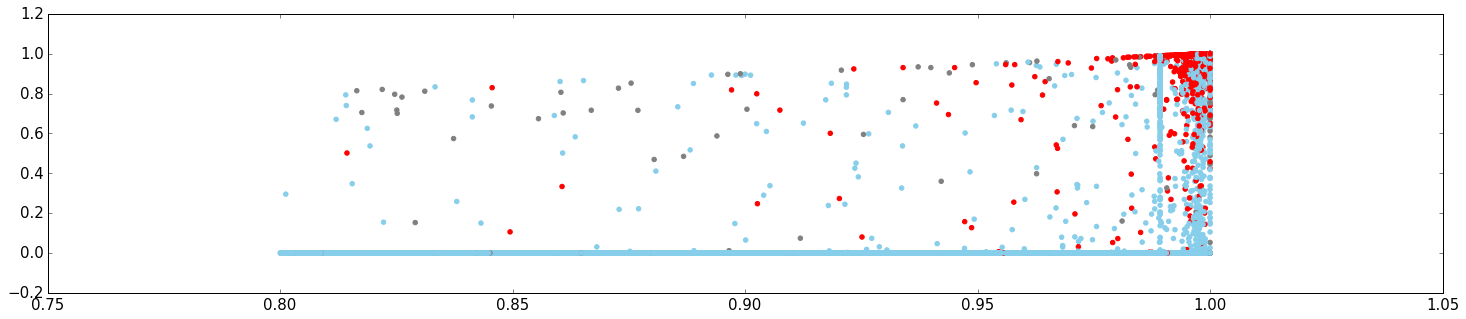

In [17]:
plt.scatter(list(df['1xcov'].values), df['30xcov'].values,color=list(df['ex_bool'].values))

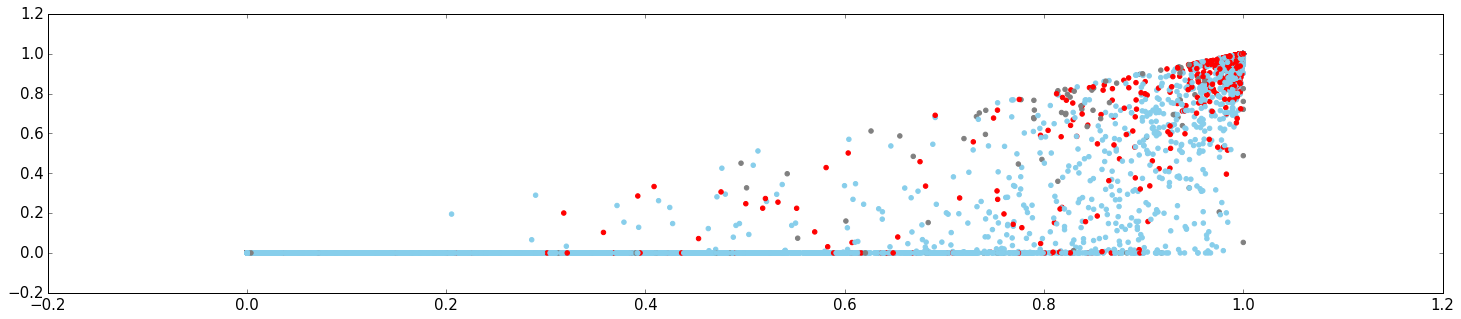

In [18]:
plt.scatter(list(df['10xcov'].values), df['30xcov'].values,color=list(df['ex_bool'].values))

In [19]:
len(genename)

29054

In [20]:
# plate show 
#genename = dicN2G[1669]
#genename = dicN2G[1670]
#genename = 'Cre12.g555200.v5.5'
#genename = multihitgenes[0]
#print(genename)
def show_where(genename):
    edf          = df_ix.loc[genename]
    columns = 'ABCDEFGH'
    columns = list(columns)
    dicCols = {y:x+1 for x, y in enumerate(columns)}
    cmap = plt.get_cmap('YlOrRd')
    if isinstance(edf,pd.Series):
        fig,ax = plt.subplots(1,figsize=(10,10))
        plate = np.matrix(np.zeros([8,12]))
        well   = edf['well'].split('_')[1]
        platen = edf['well'].split('_')[0].replace('plate','')
        depth = 1
        rpos  = dicCols[well[0]]
        cpos  = int(well[1:])
        #print(rpos,cpos)
        plate[rpos,cpos-1] = depth
        try:
            ax.set_title('plate%s, expected position : %s'%(platen,dic_ex[genename]))
        except KeyError:
            ax.set_title('plate%s, expected position : %s'%(platen,'None'))
        cax = ax.matshow(plate,cmap=cmap,vmin=0, vmax=1,interpolation='nearest')
        ax.xaxis.set_ticks(np.arange(0,12))
        ax.yaxis.set_ticks(np.arange(0,8))
        ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'],minor=False)
        ax.set_yticklabels(['A','B','C','D','E','F','G','H'],minor=False)
        for (i, j), z in np.ndenumerate(plate):
            ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
    else:
        edf['plate'] = edf['well'].apply(lambda x : x.split('_')[0].replace('plate',''))
        edf['ewell'] = edf['well'].apply(lambda x : x.split('_')[1])
        edf.reset_index(inplace=True)
        edf.set_index('plate',inplace=True)


        #fig,ax = plt.subplots(len(set(edf.index)),figsize=(10*len(set(edf.index)),10*len(set(edf.index))))
        fig,ax = plt.subplots(len(set(edf.index)),figsize=(30,30))
        #print(dic_ex[genename])

        max_depth = max(edf['depth'].astype(int))

        #cmap = colors.ListedColormap(['white', 'red'])
        
        #bounds=[0,0.01,1]
        #norm = colors.BoundaryNorm(bounds, cmap.N)
        if len(set(edf.index)) == 1:
            ix = edf.index[0]
            eedf = edf
            plate = np.matrix(np.zeros([8,12]))
            if isinstance(eedf, pd.Series) == True:
                well   = eedf['ewell']
                depth = float(eedf['depth'])/max_depth
                rpos  = dicCols[well[0]]
                cpos  = int(well[1:])
                #print(rpos,cpos)
                plate[rpos,cpos-1] = depth
            else:
                eedf.reset_index(inplace=True)

                for eix in eedf.index:
                    well   = eedf.loc[eix]['ewell']
                    depth = float(eedf.loc[eix]['depth'])/max_depth
                    rpos  = dicCols[well[0]]
                    cpos  = int(well[1:])
                    #print(rpos,cpos)
                    plate[rpos-1,cpos-1] = depth

            try:
                ax.set_title('plate%s, expected position : %s'%(ix,dic_ex[genename]))
            except KeyError:
                ax.set_title('plate%s, expected position : %s'%(ix,'None'))
            cax = ax.matshow(plate,cmap=cmap,vmin=0, vmax=1,interpolation='nearest')
            ax.xaxis.set_ticks(np.arange(0,12))
            ax.yaxis.set_ticks(np.arange(0,8))
            ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'],minor=False)
            ax.set_yticklabels(['A','B','C','D','E','F','G','H'],minor=False)
            for (i, j), z in np.ndenumerate(plate):
                ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
        else:
            for n,ix in enumerate(set(edf.index)):
                eedf = edf.loc[ix]
                plate = np.matrix(np.zeros([8,12]))
                if isinstance(eedf, pd.Series) == True:
                    well   = eedf['ewell']
                    depth = float(eedf['depth'])/max_depth
                    rpos  = dicCols[well[0]]
                    cpos  = int(well[1:])
                    #print(rpos,cpos)
                    plate[rpos-1,cpos-1] = depth
                else:
                    eedf.reset_index(inplace=True)

                    for eix in eedf.index:
                        well   = eedf.loc[eix]['ewell']
                        depth = float(eedf.loc[eix]['depth'])/max_depth
                        rpos  = dicCols[well[0]]
                        cpos  = int(well[1:])
                        #print(rpos,cpos)
                        plate[rpos-1,cpos-1] = depth


                ax[n].set_title('plate%s, expected position : %s'%(ix,dic_ex[genename]))
                cax = ax[n].matshow(plate,cmap=cmap,vmin=0, vmax=1,interpolation='nearest')
                ax[n].xaxis.set_ticks(np.arange(0,12))
                ax[n].yaxis.set_ticks(np.arange(0,8))
                ax[n].set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'],minor=False)
                ax[n].set_yticklabels(['A','B','C','D','E','F','G','H'],minor=False)
                for (i, j), z in np.ndenumerate(plate):
                    ax[n].text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

            #ax[n].set_yticklabels(['']+alpha)
            #ax[n].colorbar()

    fig.colorbar(cax,fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.savefig('%s.observed.png'%genename,bbox_inches='tight',dpi=300)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


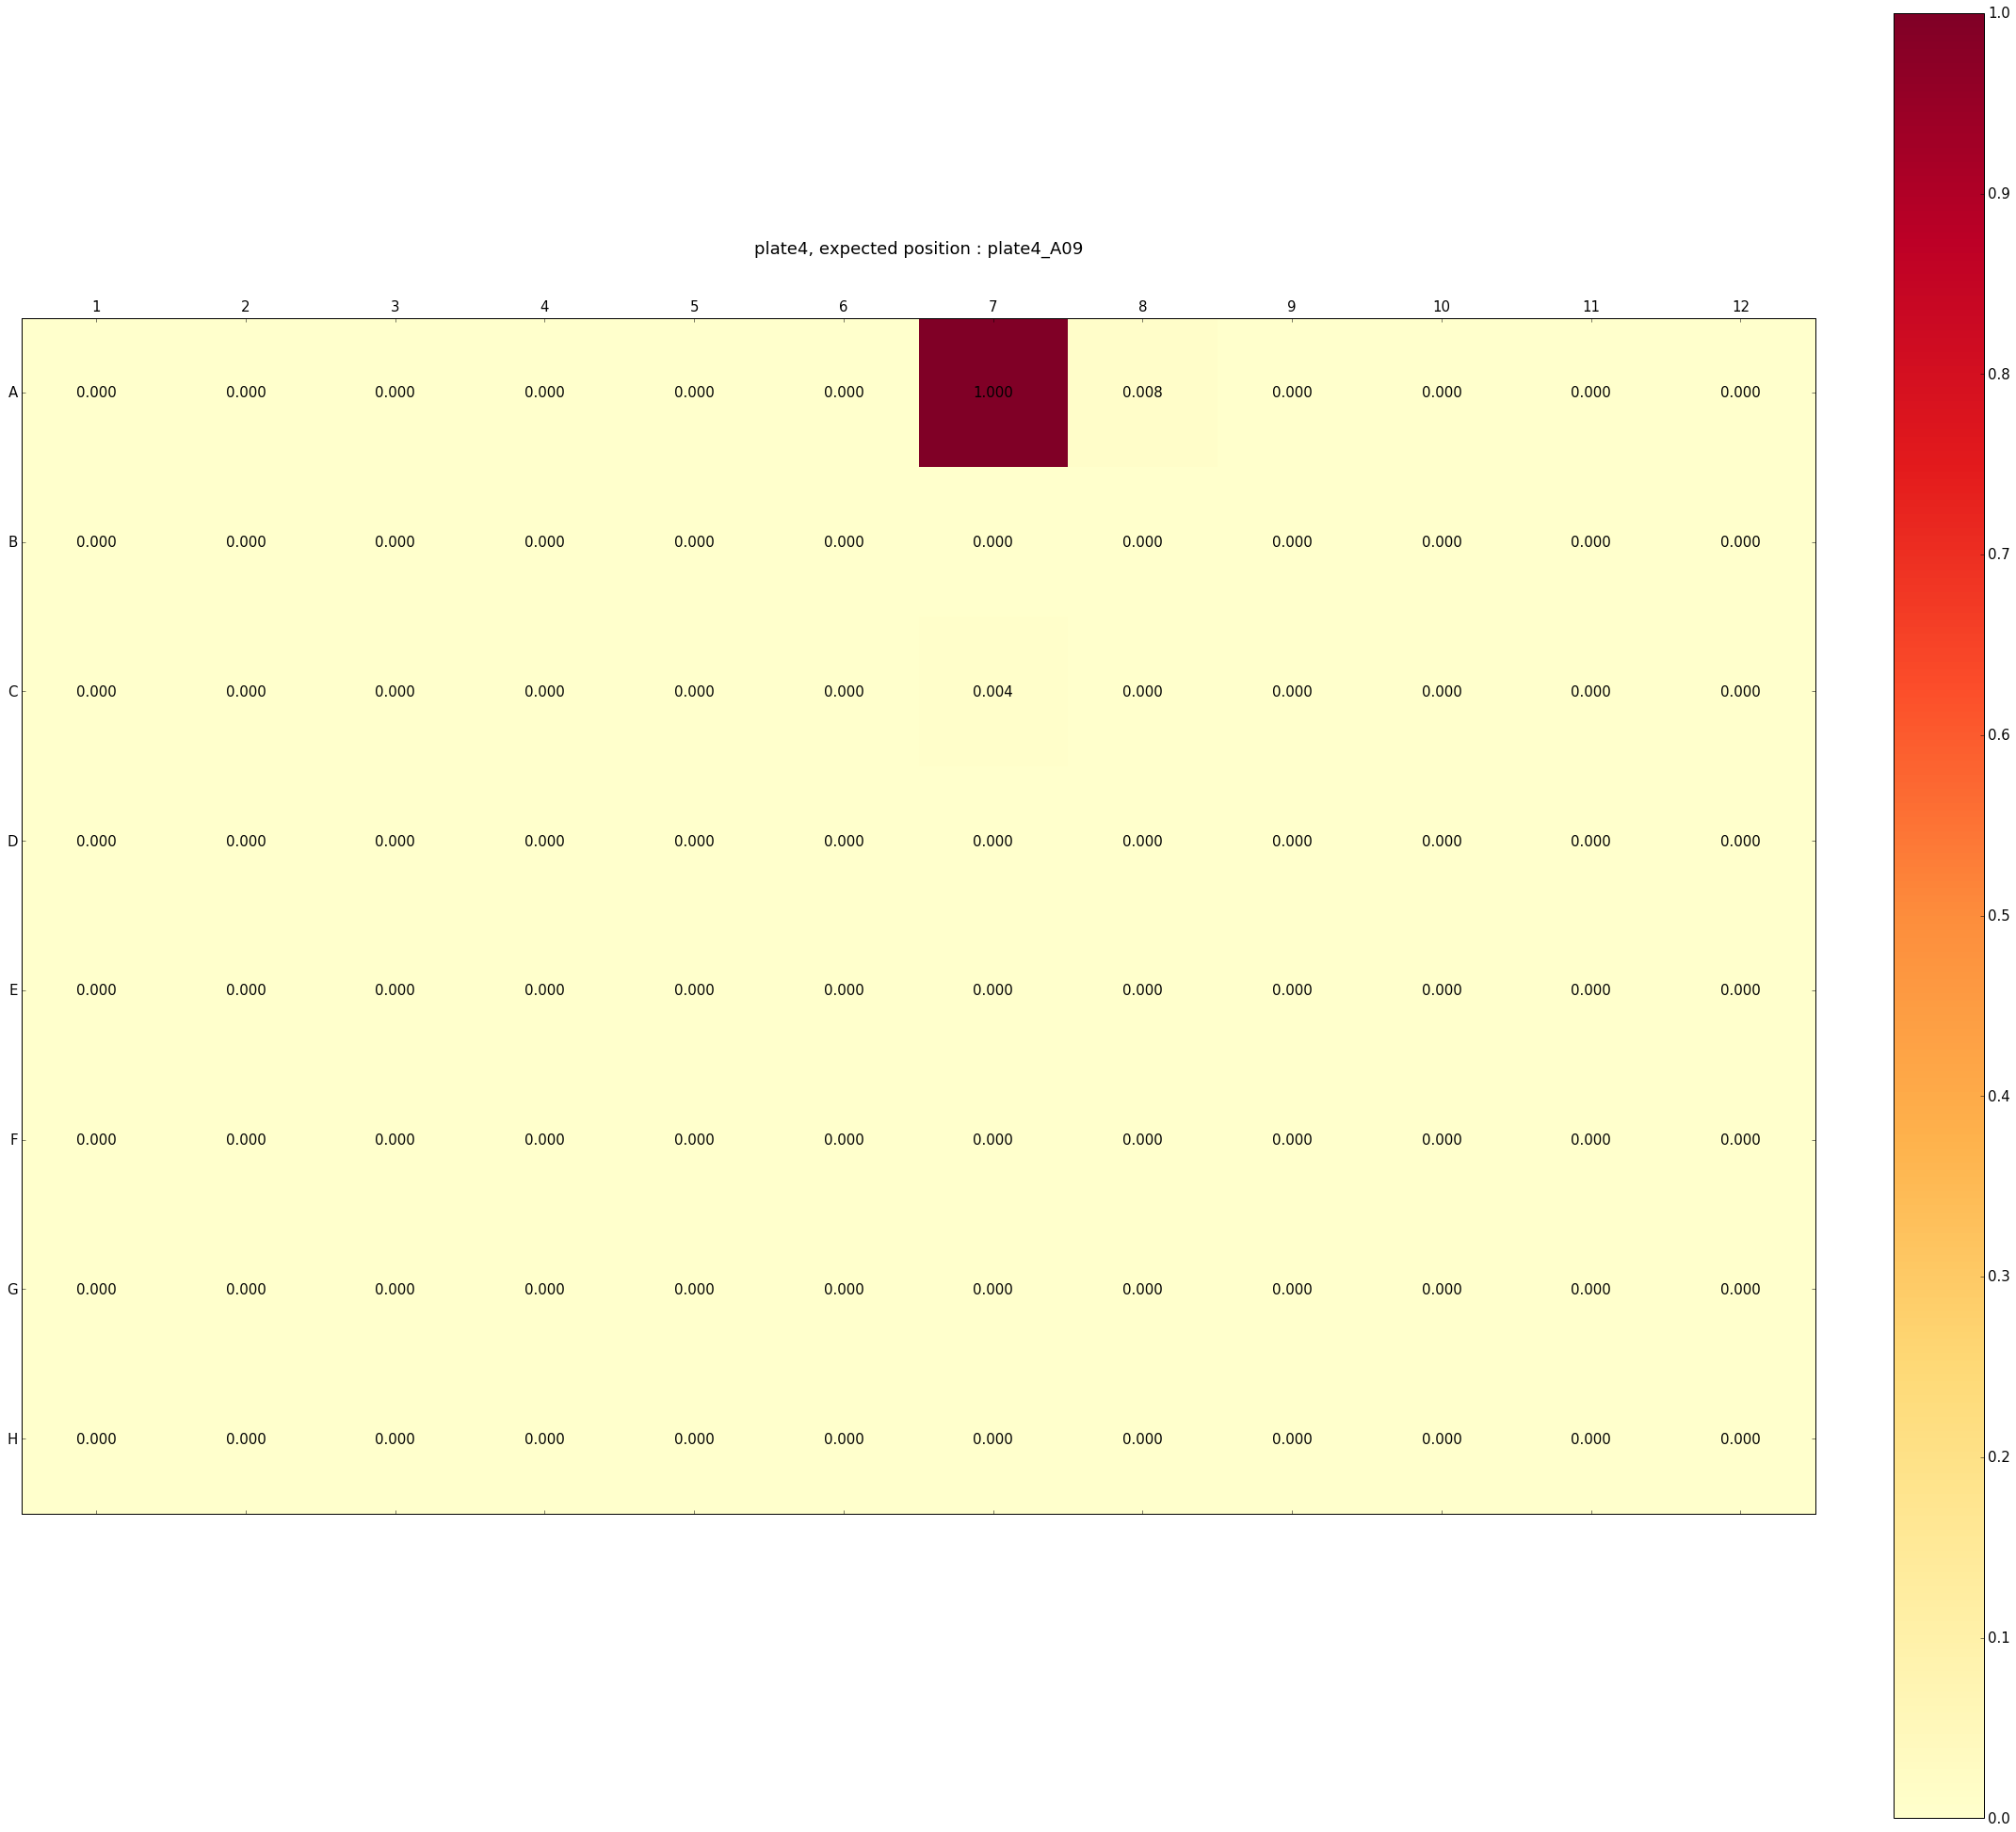

In [21]:
show_where('Cre17.g746547.v5.5')

In [22]:
positive_genes = open('positive.genes.txt').readlines()

In [23]:
positive_genes = set([x.strip() for x in positive_genes])

In [25]:
mask   = df['genename'].apply(lambda x : x in positive_genes)
tru_df = df[mask]
mask   = (tru_df['ex_bool'] == 'red')
tru_df = tru_df[mask]

In [26]:
cov_1x_a = len((tru_df['1xcov'].astype(float) >= 0.9 ).nonzero()[0])
cov_1x_b = len(((tru_df['1xcov'].astype(float) >= 0.6) & (tru_df['1xcov'].astype(float) < 0.9)).nonzero()[0])
cov_1x_c = len((tru_df['1xcov'].astype(float) < 0.6 ).nonzero()[0])

In [27]:
cov_1x_a,cov_1x_b,cov_1x_c

(2120, 26, 0)

In [28]:
cov_10x_a = len((tru_df['10xcov'].astype(float) >= 0.9 ).nonzero()[0])
cov_10x_b = len(((tru_df['10xcov'].astype(float) >= 0.6) & (tru_df['10xcov'].astype(float) < 0.9)).nonzero()[0])
cov_10x_c = len((tru_df['10xcov'].astype(float) < 0.6 ).nonzero()[0])

In [29]:
cov_30x_a = len((tru_df['30xcov'].astype(float) >= 0.9 ).nonzero()[0])
cov_30x_b = len(((tru_df['30xcov'].astype(float) >= 0.6) & (tru_df['30xcov'].astype(float) < 0.9)).nonzero()[0])
cov_30x_c = len((tru_df['30xcov'].astype(float) < 0.6 ).nonzero()[0])

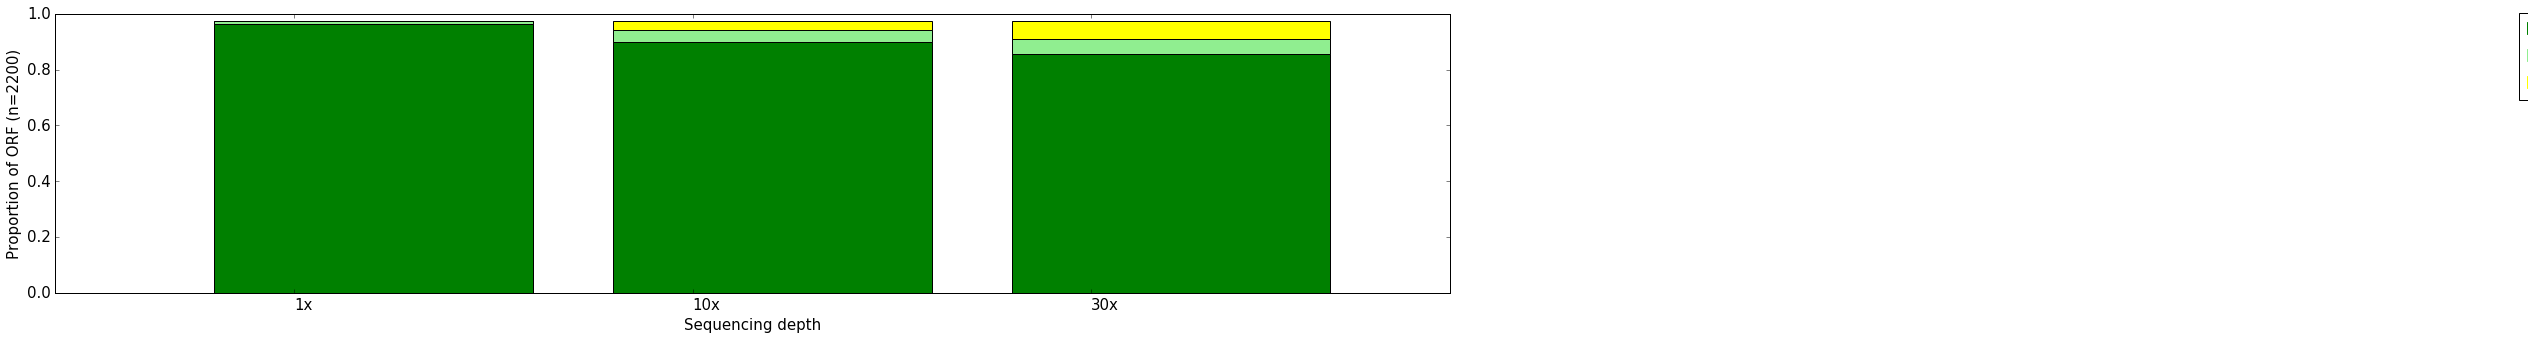

In [30]:
#cov1x = np.array([cov_1x_a,cov_1x_b,cov_1x_c])
#cov10x = np.array([cov_10x_a,cov_10x_b,cov_10x_c])
#cov30x = np.array([cov_30x_a,cov_30x_b,cov_30x_c])
#plt.rcParams['figure.figsize'] = (5,5)
fig,ax = plt.subplots(1)
a = np.array([cov_1x_a,cov_10x_a,cov_30x_a])/float(2200)
b = np.array([cov_1x_b,cov_10x_b,cov_30x_b])/float(2200)
c = np.array([cov_1x_c,cov_10x_c,cov_30x_c])/float(2200)
ind = np.array([0.4,1.4,2.4])
width = 0.8
p1 = ax.bar(ind, a, width, color='green')
p2 = ax.bar(ind, b, width, color='lightgreen',bottom=a)
p3 = ax.bar(ind, c, width, color='yellow',bottom=a+b)
ax.set_xticks(ind+0.2)
ax.set_xticklabels(['1x','10x','30x'],ha='left')
ax.set_xlabel('Sequencing depth')
ax.set_ylabel('Proportion of ORF (n=2200)')
import matplotlib.patches as mpatches

plt.figlegend([mpatches.Patch(color=x) for x in ['green','lightgreen','yellow']],['>= 90%','60% ~ 90%','< 60%'],bbox_to_anchor=[1.5,0.93],loc='upper right')
#plt.tight_layout()
plt.show()
#plt.xlim(0.5,4)

In [31]:
df.head()

,well,genename,1xcov,10xcov,30xcov,rDepth,depth,match,match.ratio,ex_bool
0,plate9_F08,Cre16.g683750.v5.5,1.0,0.995951417004,0.995951417004,1891.81511471,1401835,741,1.0,red
1,plate9_F08,Cre12.g489000.v5.5,0.982330954808,0.0193679918451,0.0,4.83554196398,14231,2857,0.970778117567,skyblue
2,plate9_F08,Cre10.g443550.v5.5,0.948741845294,0.0919540229885,0.0,4.20037278658,13521,2651,0.823547685617,skyblue
3,plate9_F08,Cre09.g392319.v5.5,0.96568627451,0.104691876751,0.0,4.5493697479,12993,2758,0.96568627451,skyblue
4,plate9_F08,Cre09.g402500.v5.5,0.945538818076,0.0177674777907,0.0,4.29741212823,11126,2418,0.933951332561,skyblue


In [32]:
df['plate'] = df['well'].apply(lambda x : x.split('_')[0])

In [33]:
df_plate_ix = df.set_index('plate')

In [67]:
df_plate_ix.head()

,well,genename,1xcov,10xcov,30xcov,rDepth,depth,match,match.ratio,ex_bool
plate,,,,,,,,,,
plate9,plate9_F08,Cre16.g683750.v5.5,1.0,0.995951417004,0.995951417004,1891.81511471,1401835,741,1.0,red
plate9,plate9_F08,Cre12.g489000.v5.5,0.982330954808,0.0193679918451,0.0,4.83554196398,14231,2857,0.970778117567,skyblue
plate9,plate9_F08,Cre10.g443550.v5.5,0.948741845294,0.0919540229885,0.0,4.20037278658,13521,2651,0.823547685617,skyblue
plate9,plate9_F08,Cre09.g392319.v5.5,0.96568627451,0.104691876751,0.0,4.5493697479,12993,2758,0.96568627451,skyblue
plate9,plate9_F08,Cre09.g402500.v5.5,0.945538818076,0.0177674777907,0.0,4.29741212823,11126,2418,0.933951332561,skyblue


In [70]:
def plate_vis(platen):
    cmap = plt.get_cmap('YlOrRd')
    columns = 'ABCDEFGH'
    columns = list(columns)
    dicCols = {y:x+1 for x, y in enumerate(columns)}
    matrix_plate = np.matrix(np.zeros([8,12]))
    edf = df_plate_ix.loc[platen]
    edf = edf.reset_index()
    for ix in edf.index:
        eedf = edf.loc[ix]
        well = eedf['well'].split('_')[1]
        col  = dicCols[well[0]]
        row  = int(well[1:])
        matrix_plate[col-1,row-1] += 1
    fig,ax = plt.subplots(1,figsize=(10,10))
    cax = ax.matshow(matrix_plate,cmap=cmap,vmin=0,vmax=100,interpolation='nearest')
    ax.set_title(platen)
    ax.xaxis.set_ticks(np.arange(0,12))
    ax.yaxis.set_ticks(np.arange(0,8))
    ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'],minor=False)
    ax.set_yticklabels(['A','B','C','D','E','F','G','H'],minor=False)
    for (i, j), z in np.ndenumerate(matrix_plate):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    fig.colorbar(cax,fraction=0.046, pad=0.04)  
    plt.tight_layout()
    plt.savefig('%s.png'%platen,bbox_inches='tight',dpi=300)

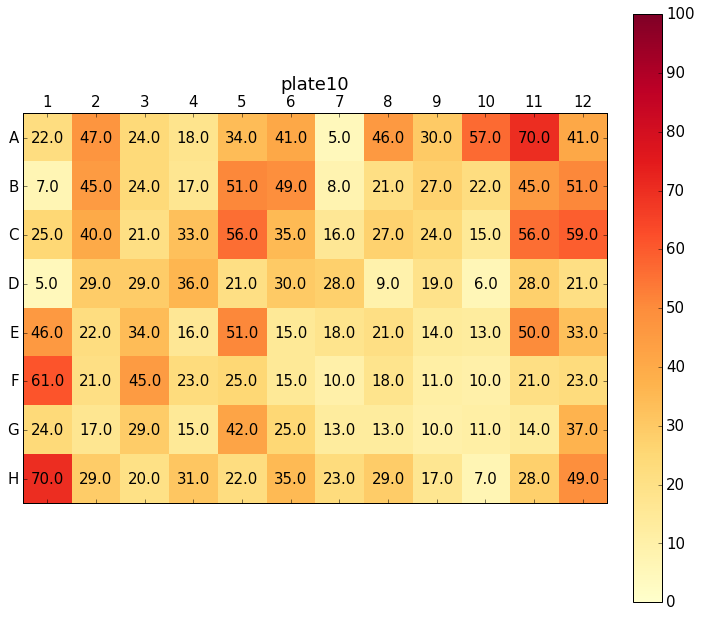

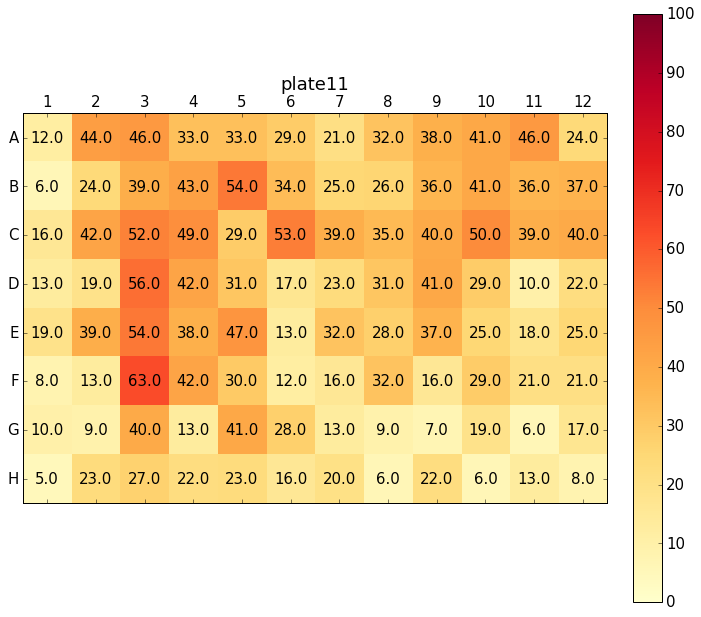

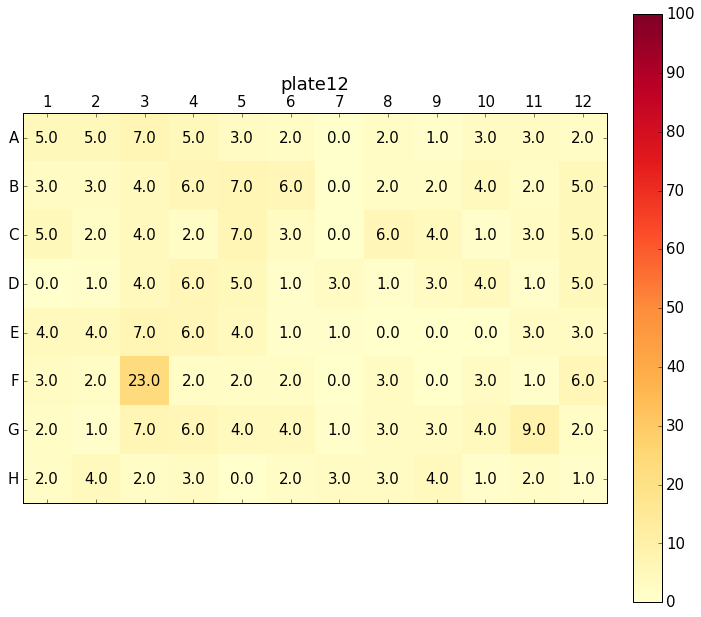

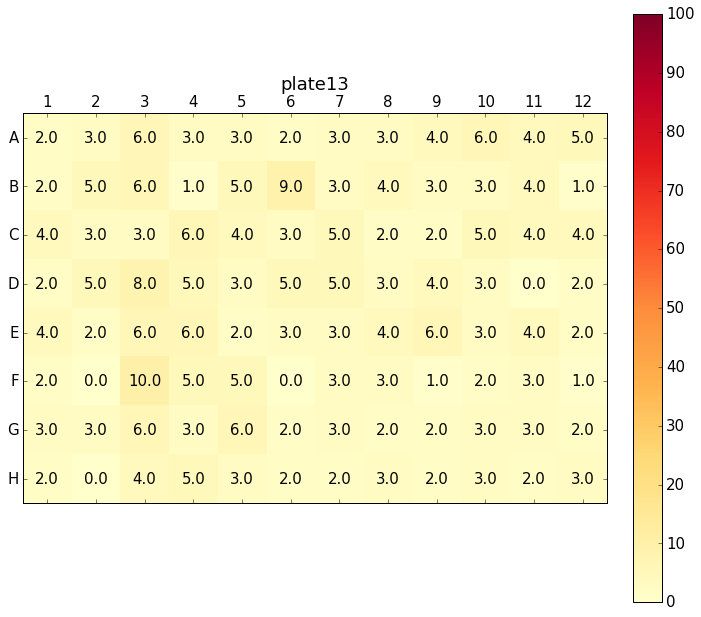

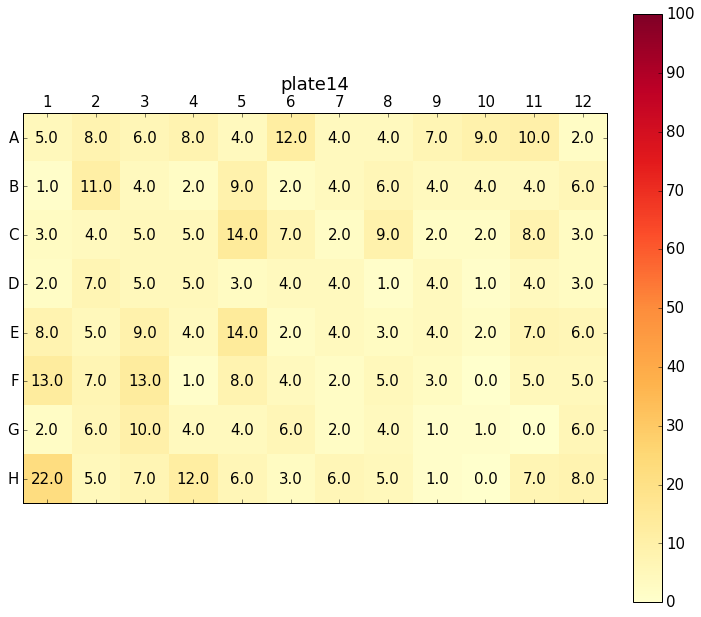

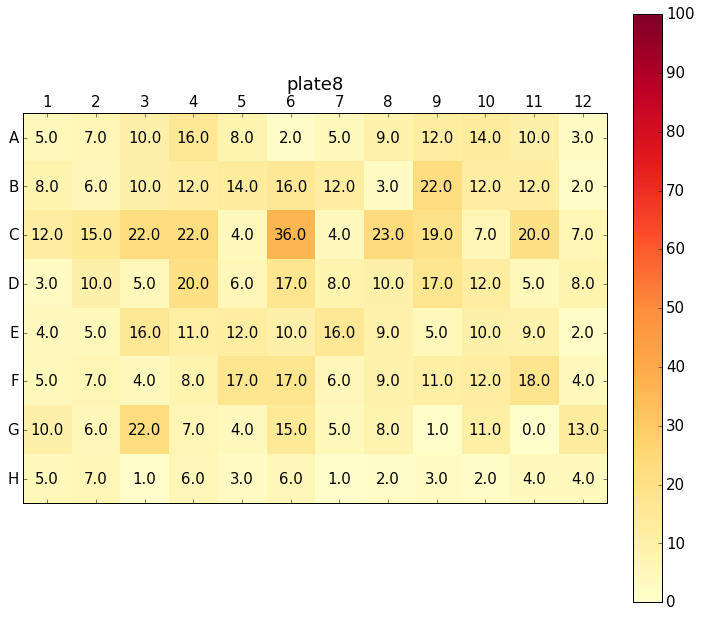

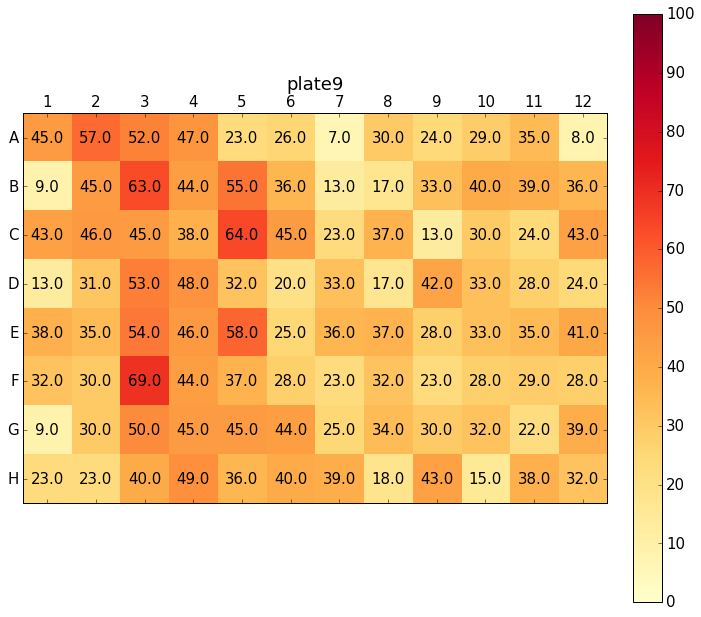

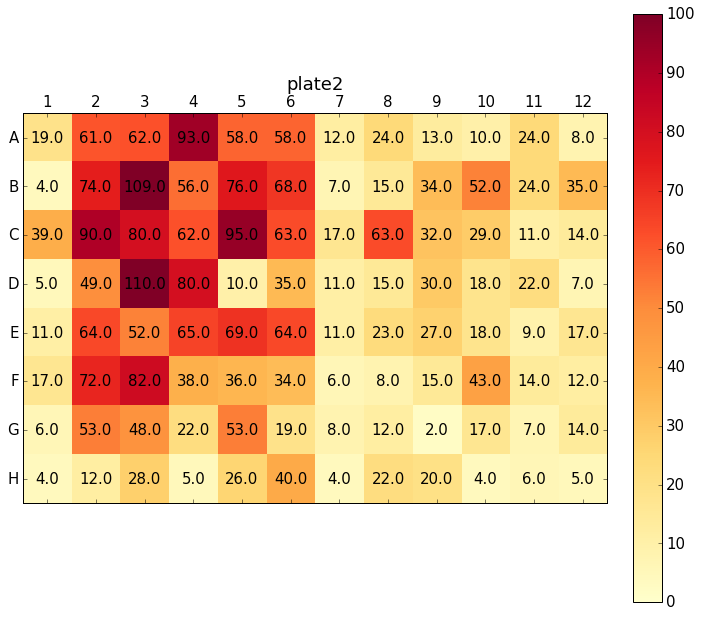

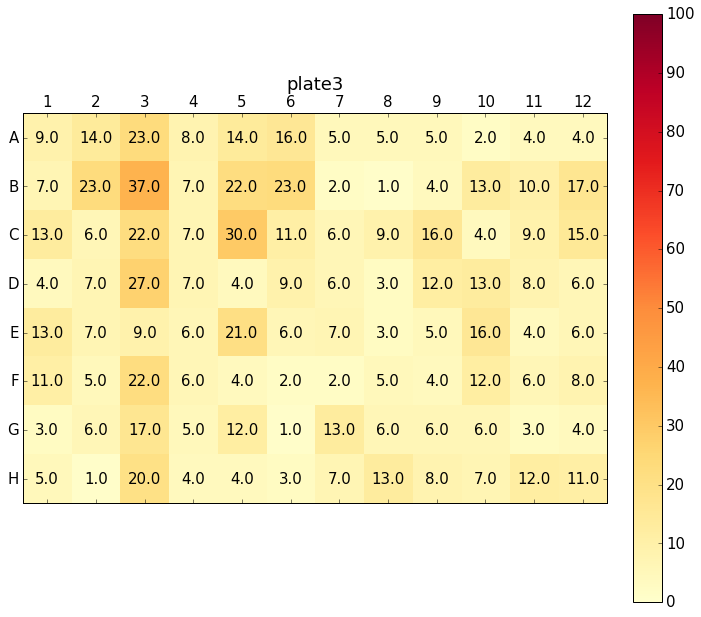

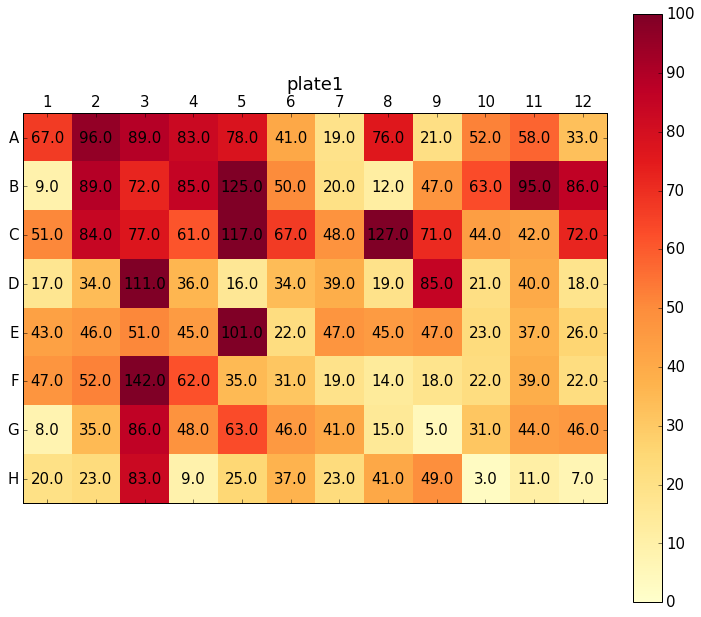

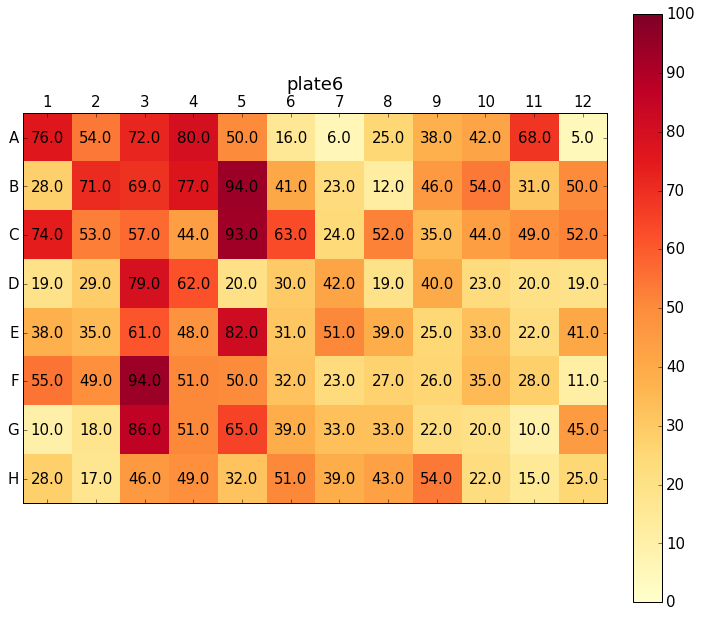

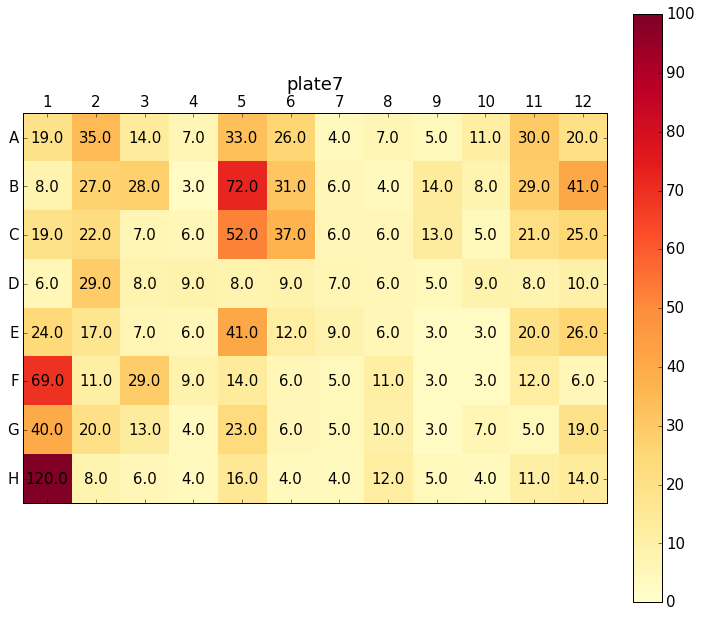

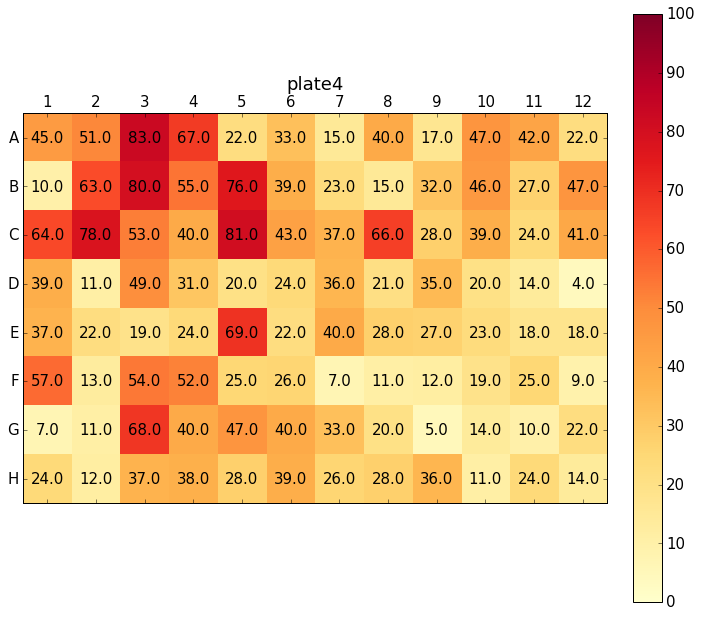

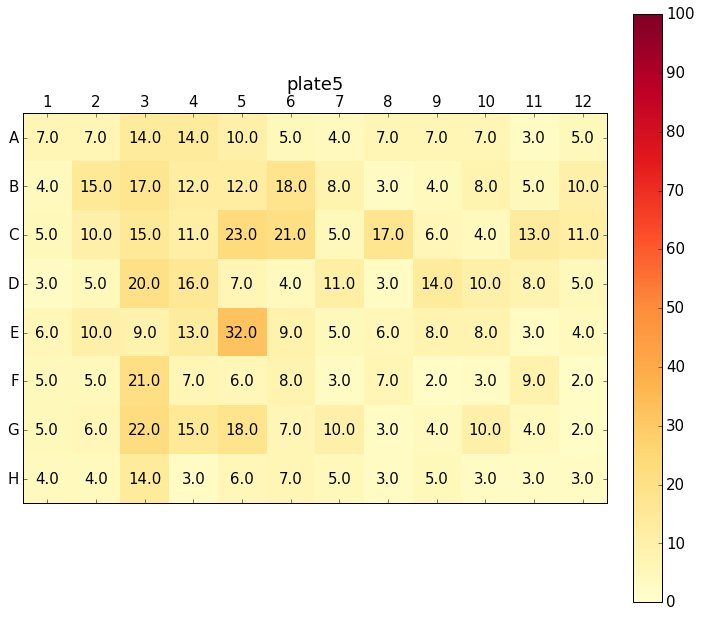

In [71]:
for platen in list(set(df_plate_ix.index)):
    plate_vis(platen)